# 06. 통계적 추론

### T1. 데이터 읽어 오기

In [ ]:
import pandas as pd

sleeps = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/sleep.csv',index_col='no')
sleeps.head()

,extra,group,ID
no,,,
1,0.7,1,1
2,-1.6,1,2
3,-0.2,1,3
4,-1.2,1,4
5,-0.1,1,5


### T2. Simple Filtering in Panda's DataFrame

In [ ]:
print(sleeps['extra'][sleeps['group']==1])
print(sleeps['extra'][sleeps['group']==1].describe())

### T3. 기초 시각화

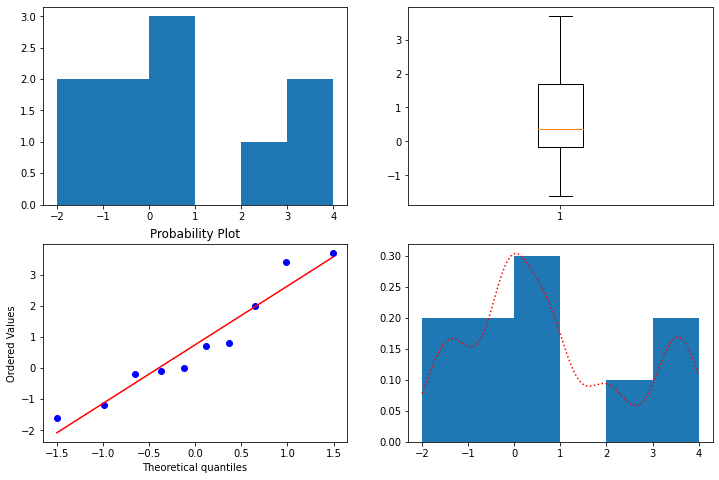

In [ ]:
#@title
import matplotlib.pyplot as plt
from scipy.stats import probplot
Group1 = sleeps['extra'][sleeps['group']==1]

plt.rcParams['figure.figsize'] = [12,8]
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.hist(Group1,bins=[-2,-1,0,1,2,3,4])

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(Group1)

ax3 = fig.add_subplot(2,2,3)
probplot(Group1, plot=ax3)

ax4 = fig.add_subplot(2,2,4)
from scipy.stats import gaussian_kde
import numpy as np
density = gaussian_kde(Group1)
density.covariance_factor = lambda : .25
density._compute_covariance()
xs = np.linspace(-2,4,200)
ax4.plot(xs,density(xs),'r:')
ax4.hist(Group1, bins=[-2,-1,0,1,2,3,4], density=True)

plt.show()

### T4. One sample $t$-test

Colab의 scipy.stats version 문제로 ttest_1samp() 함수에서 alternative 인자 지원하지 않음. (default 값은 2-sided)
'greater', 'less'와 같은 one-sided test를 위한 p-value는 2-sided ttest의 결과 p 값의 반으로 하면 됨 

In [ ]:
import scipy.stats as stat

mu_in_H0 = 0
sample = sleeps['extra'][sleeps['group']==1]
result1 = stat.ttest_1samp(sample,mu_in_H0)
print(f't-statistic : {result1.statistic}, p-Value : {result1.pvalue} / two-sided test')

# 다음 코드는 Colab에서 에러를 발생시킴 
#result2 = stat.ttest_1samp(sample,0, alternative = 'greater')
#print(result2)

print(f'p-value for an one-sided test is {result1.pvalue/2}')

t-statistic : 1.3257101407138212, p-Value : 0.2175977800684489 / two-sided test
p-value for an one-sided test is 0.10879889003422445


### T5. 함수를 이용하지 않고 $t$-statistic과 $p$-value, Confidence Interval을 직접 계산

In [ ]:
import numpy as np
import scipy.stats as stats
import math

mu_in_H0 = 0
sample = sleeps['extra'][sleeps['group']==1]
t_stat = (sample.mean()-mu_in_H0)/math.sqrt(sample.var()/sample.count())
print(f't-statistic : {t_stat}')

df = sample.count()-1  #df : degree of freedom
rv_t = stats.t(df)
print(f'pvalue(!= 0) ={(1-rv_t.cdf(t_stat))*2}')
print(f'pvalue(> 0) = {1-rv_t.cdf(t_stat)}')

alpha = 0.05
print(f'Lower : {sample.mean() - rv_t.ppf(1-alpha/2) * math.sqrt(sample.var()/sample.count())}')
print(f'Upper : {sample.mean() + rv_t.ppf(1-alpha/2) * math.sqrt(sample.var()/sample.count())}')

print(f'CI : {sample.mean() + np.array(rv_t.interval(0.95)) * math.sqrt(sample.var()/sample.count())}')

t-statistic : 1.3257101407138212
pvalue(!= 0) =0.21759778006844877
pvalue(> 0) = 0.10879889003422438
Lower : -0.5297804134938646
Upper : 2.0297804134938646
CI : [-0.52978041  2.02978041]
